# Create Intermediate Raster Result

In [1]:
from datetime import datetime

import geoengine as ge
from geoengine import colorizer as co 
from matplotlib import cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


## Initialize Geo Engine

In [2]:
ge.initialize("http://localhost:3030")

In [3]:
session = ge.get_session()
session

Server:              http://localhost:3030
Session Id:          6d70e7c9-d4e3-4ffa-bd9e-9abbfebdad83

## Define workflow of MODIS NDVI raster

In [4]:
workflow = ge.register_workflow({
                "type": "Raster",
                "operator": {
                    "type": "GdalSource",
                    "params": {
                        "dataset": {
                            "type": "internal",
                            "datasetId": "36574dc3-560a-4b09-9d22-d5945f2b8093"
                        }
                    }
                }
            })
workflow

8df9b0e6-e4b4-586e-90a3-6cf0f08c4e62

In [5]:

# this method is only used to display the results a bit more concise.
def plot_geoengine_img(colorizer: list):
    time = datetime.strptime(
    '2014-04-01T12:00:00.000Z', "%Y-%m-%dT%H:%M:%S.%f%z")

    # create horizontal subplots
    fig, axs = plt.subplots(1, len(colorizer), figsize=(10, 5))

    imgs = []
    for col in colorizer:
        img = workflow.wms_get_map_as_image(
        ge.QueryRectangle(
            [-180.0, -90.0, 180.0, 90.0],
            [time, time],
            resolution=(1.8, 1.8)
            ),
            col)

        imgs.append(img)
    
    for (ax, img) in zip(axs, imgs):
        ax.imshow(img)

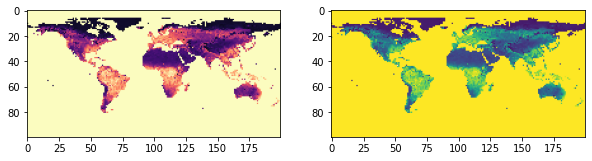

In [6]:
# default maps
colors = [co.colorize("magma"), co.colorize("viridis")]
plot_geoengine_img(colors)

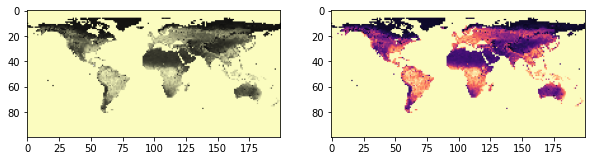

In [7]:
# configure the steps
colors = [co.colorize("magma", n_steps=2), co.colorize("magma", n_steps=20)]
plot_geoengine_img(colors)

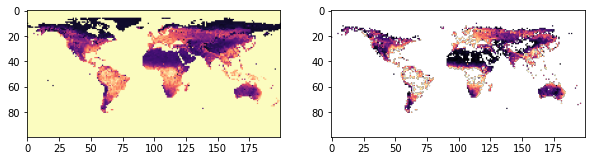

In [8]:
# configure the value range
colors = [co.colorize("magma", min_max=(0,255)), co.colorize("magma", min_max=(50,200))]
plot_geoengine_img(colors)

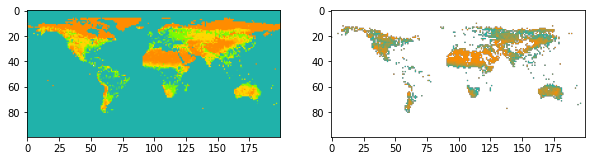

In [9]:
# use custom maps

custom_map = ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen"])
colors = [
    co.colorize(custom_map), # default
    co.colorize(custom_map, n_steps=2, min_max=(50,150)) # with options
    ]
plot_geoengine_img(colors)

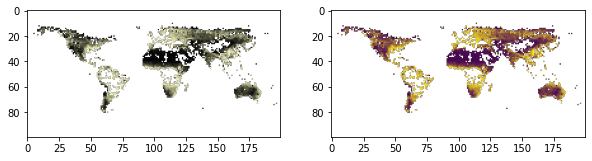

In [14]:
# set global defaults
# if you need multiple maps with the same set of options
co.set_default_steps(2)
co.set_default_min_max((50,200))

colors = [co.colorize("magma"), co.colorize("viridis")]
plot_geoengine_img(colors)